# Simulation of prices of coupon-bearing Bonds using CIR

In [19]:
import numpy as np
import pandas as pd
import edhec_risk_kit as erk
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
erk.bond_price(5, 100, 0.05, 12, 0.03)

0    109.275393
dtype: float64

In [21]:
rates, zc_prices = erk.updated_cir(10, 500, b=0.03, r_0=0.03)

In [22]:
erk.bond_price(5, 100, 0.05, 12, rates.iloc[0][[1,2,3]])

1    109.275393
2    109.275393
3    109.275393
dtype: float64

In [23]:
erk.bond_price(5, 100, 0.05, 12, rates.iloc[1][[1,2,3]])

1    108.224418
2    108.124991
3    106.721024
dtype: float64

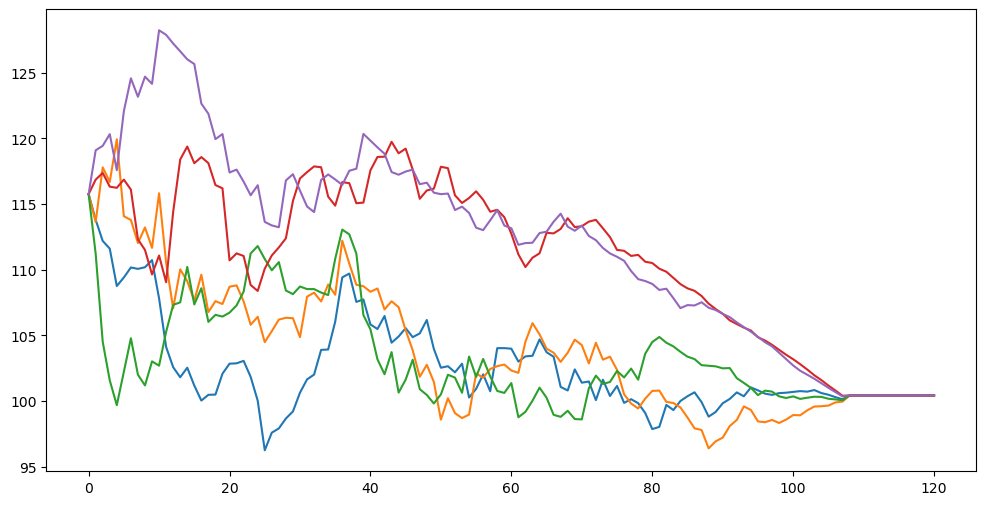

In [24]:
erk.bond_price(9, 100, 0.05, 12, rates[[1,2,3,4,5]]).plot(legend=False, figsize=(12,6))
plt.show()

In [25]:
prices= erk.bond_price(10, 100, 0.05, 12, rates[[1,2,3,4,5]])
prices

,1,2,3,4,5
0,117.260292,117.260292,117.260292,117.260292,117.260292
1,115.120579,114.930825,112.269575,118.499924,120.977599
2,113.35593,119.557866,104.918605,119.087199,121.375822
3,112.722679,118.343311,101.709459,117.944862,122.391957
4,109.594174,121.979195,99.652489,117.865226,119.360269
...,...,...,...,...,...
116,100.554651,99.937501,100.27766,101.537344,101.529758
117,100.377891,99.884285,100.320153,101.149984,101.148266
118,100.194801,99.874225,100.206629,100.737845,100.817194
119,100.073489,99.977325,100.128748,100.372019,100.413495


In [26]:
br = prices.pct_change().dropna()
erk.annualize_rets(br,12)

/var/folders/_5/80rp92qj06xby1j6gc1k5r100000gn/T/ipykernel_58245/3018233284.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  br = prices.pct_change().dropna()


1   -0.015387
2   -0.015387
3   -0.015387
4   -0.015387
5   -0.015387
dtype: float64

In [27]:
p = erk.bond_price(10, 100, 0.05, 12, rates[[1,2,3,4]])
btr = erk.bond_total_return(p, 100, 0.05, 12)
erk.annualize_rets(btr,12)

/Applications/SelfStudy/PythonForPortfolio/Module 4/edhec_risk_kit.py:596: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4166666666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
/Applications/SelfStudy/PythonForPortfolio/Module 4/edhec_risk_kit.py:596: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4166666666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
/Applications/SelfStudy/PythonForPortfolio/Module 4/edhec_risk_kit.py:596: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4166666666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
/Applications/SelfStudy/PythonForPortfolio/Module 4/edhec_risk_kit.

1    0.033575
2    0.033062
3    0.033106
4    0.028831
dtype: object

In [28]:
price_10 = erk.bond_price(10, 100, 0.05,12,rates)
price_10[[1,2,3]].tail()

,1,2,3
116,100.554651,99.937501,100.27766
117,100.377891,99.884285,100.320153
118,100.194801,99.874225,100.206629
119,100.073489,99.977325,100.128748
120,100.416667,100.416667,100.416667


In [29]:
price_30 = erk.bond_price(30, 100, 0.05, 12, rates) # type: ignore
price_30[[1,2,3]].tail()

,1,2,3
116,124.738887,97.62215,111.516475
117,122.07346,94.28739,118.325098
118,116.488465,90.945728,117.598266
119,112.08021,96.61878,122.425649
120,111.66612,95.812667,119.571729


In [30]:
rets_30 = erk.bond_total_return(price_30, 100, 0.05, 12)
rets_10 = erk.bond_total_return(price_10, 100, 0.05, 12)
rets_bonds = 0.6 * rets_10 + 0.4 * rets_30

/Applications/SelfStudy/PythonForPortfolio/Module 4/edhec_risk_kit.py:596: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4166666666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
/Applications/SelfStudy/PythonForPortfolio/Module 4/edhec_risk_kit.py:596: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4166666666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
/Applications/SelfStudy/PythonForPortfolio/Module 4/edhec_risk_kit.py:596: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4166666666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
/Applications/SelfStudy/PythonForPortfolio/Module 4/edhec_risk_kit.

In [31]:
mean_rets_bond = rets_bonds.mean(axis="columns")
erk.summary_stats(pd.DataFrame(mean_rets_bond))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.035863,0.003422,0.803089,4.520265,-0.00159,-0.001152,1.667549,0.0


In [32]:
price_eq = erk.gbm(n_years=10, n_scenarios = 500, mu=0.07, sigma=0.15)
price_eq.shape

(121, 500)

In [33]:
rets_eq = price_eq.pct_change().dropna()
rets_eq.shape

(120, 500)

In [ ]:
rets_bonds.shapema

(120, 500)

In [36]:
rets = 0.7 * rets_eq + 0.3 * rets_bonds
rets_mean = rets.mean(axis="columns")
erk.summary_stats(pd.DataFrame(rets_mean))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.060762,0.004824,0.15859,2.651692,-0.002701,-0.00238,6.206205,0.0
